Exercício de Regressão Linear com múltiplas variáveis

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline             

pd.set_option('display.max_columns', 21)
dt = pd.read_csv('D:\\ML\\Didatica Tech\\Datasets\\kc_house_data.csv')

In [3]:
dt.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dt.shape

(21613, 21)

In [5]:
def plot_corr(dt, size=20):
    corr = dt.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 


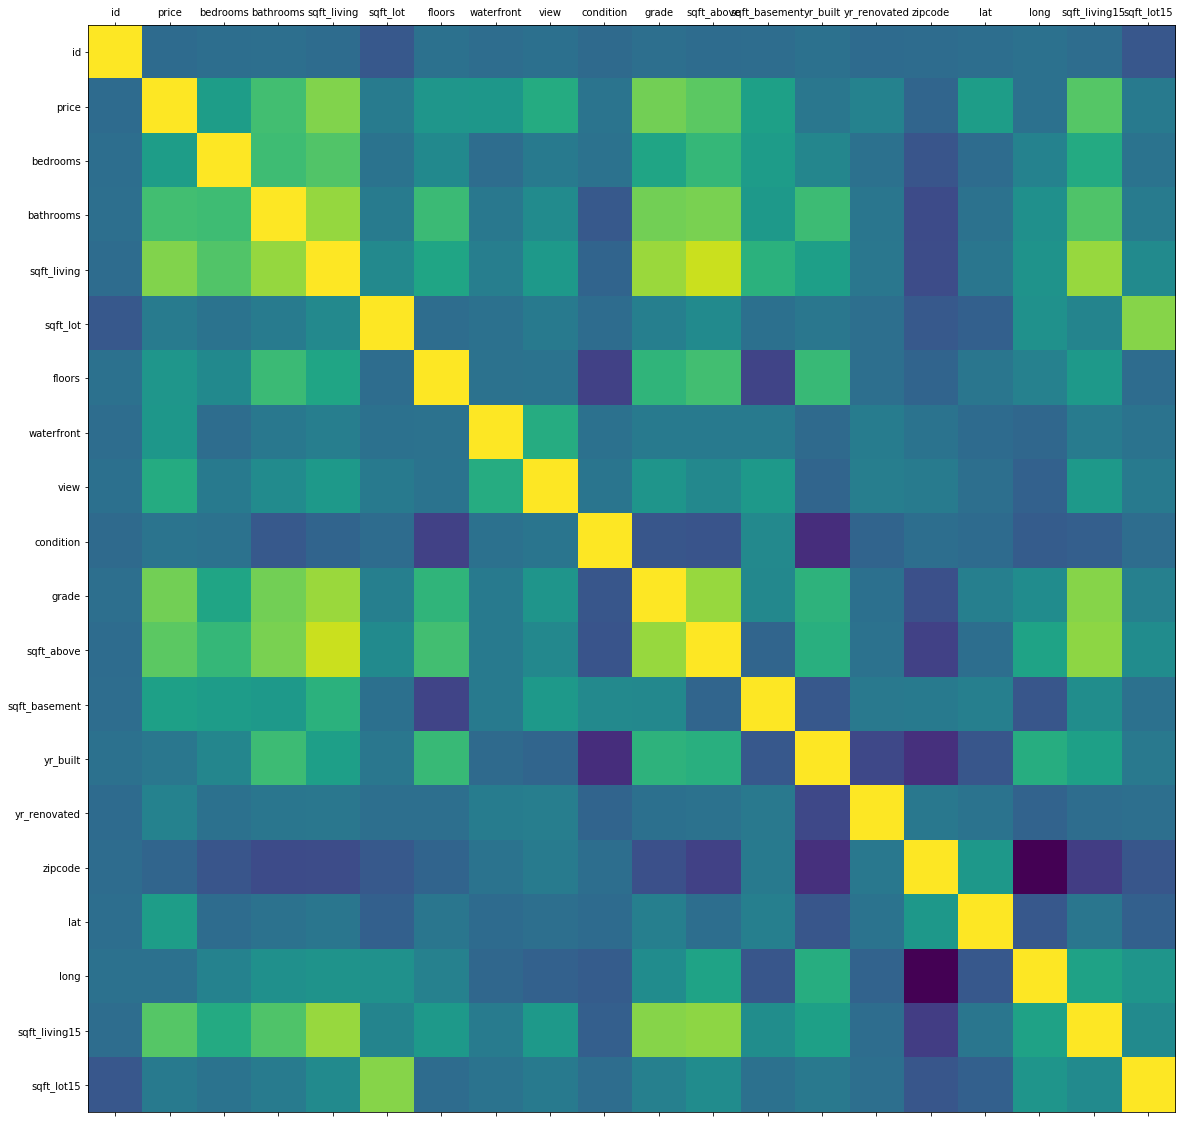

In [6]:
plot_corr(dt)

In [7]:
# Seleção de variáveis preditoras (Feature Selection)

# uma das formas para fazer a seleção é carregar num vetor apenas os campos desejados
#atributos = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_fasement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# outra forma é excluir do dataset as colunas indesejadas
dt.drop('id', axis = 1, inplace = True) # axis = 1 -> eixo das colunas | inplace = True -> mantém o cursor na mesma linha
dt.drop('date', axis = 1, inplace = True)
dt.drop('zipcode', axis = 1, inplace = True)
dt.drop('lat', axis = 1, inplace = True)
dt.drop('long', axis = 1, inplace = True)

In [8]:
# Variável a ser prevista
 
#atrib_prev = ['price']  -> assim, é criado um array com os valores da coluna price

y = dt['price'] # -> assim, é mantida a coluna no mesmo formato do dataset

In [9]:
x = dt.drop('price', axis = 1)

In [10]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state = 10)

In [12]:
modelo = LinearRegression()

In [13]:
modelo.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# calculando o coeficiente R2
resultado = modelo.score(x_teste, y_teste)

In [15]:
resultado

0.6608668622831522

In [17]:
from sklearn.linear_model import Ridge
modeloRidge = Ridge()
modeloRidge.fit(x_treino, y_treino)
resultadoRidge = modeloRidge.score(x_teste, y_teste)
print(resultadoRidge)

0.6608235332447631


In [26]:
from sklearn.linear_model import Lasso
modeloLasso = Lasso(alpha=100, max_iter=1000, tol=0.1)
modeloLasso.fit(x_treino, y_treino)
resultadoLasso = modeloLasso.score(x_teste,y_teste)
print(resultadoLasso)
# parâmetros importantes (quando aparece mensagem 'ConvergenceWaring' deve-se alterar algum dos parâmetros abaixo)
# alpha = peso que é dado à regularização na equação. Quando o alpha for zero, a equação é igual à da Linear Regression
# max_iter -> número máximo de iterações 
# tol -> valor mínimo entre uma iteração e outra, quando atingido para as iterações

0.6607190300701028


In [37]:
from sklearn.linear_model import ElasticNet
# ElasticNet -> combina o modelo Lasso e o modelo Ridge
# parâmetro l1_ratio determina o peso de cada modelo na equação. 
#    Quanto mais próximo de 1, maior é o peso da Lasso. 
modeloElasticNet = ElasticNet(alpha=1, l1_ratio=0.9, tol=0.2, max_iter=5000)
modeloElasticNet.fit(x_treino, y_treino)
resultadoElasticNet = modeloElasticNet.score(x_teste, y_teste)
print(resultadoElasticNet)

0.6423257787570249
